<a href="https://colab.research.google.com/github/sultanbst123/work_hours_prediction-competition-/blob/main/Work_hours_prediction(modelling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
!pip install optuna

In [ ]:
!pip install borutashap

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            log_loss, roc_auc_score, plot_roc_curve) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
 
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Work_hours_prediction/train_work-hours-prediction(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Work_hours_prediction/test_work-hours-prediction(clean).csv")

In [ ]:
train.head()

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
0,Private,HS-grad,Never-married,service,Unmarried,White,Male,min,none,44,United-States,<=50K,50-75
1,self_emp,Bachelors,married,Sales,Husband,White,Male,max,none,44,United-States,>50K,75-100
2,Private,Bachelors,married,blue-colar,Husband,Amer-Indian-Eskimo,Male,max,none,57,United-States,>50K,25-50
3,to_gov,Bachelors,married,Prof-specialty,Husband,White,Male,max,none,44,United-States,>50K,75-100
4,self_emp,Masters,not-married,Exec-managerial,Not-in-family,White,Male,max,none,58,United-States,<=50K,25-50


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       18944 non-null  object
 1   education       18944 non-null  object
 2   marital-status  18944 non-null  object
 3   occupation      18944 non-null  object
 4   relationship    18944 non-null  object
 5   race            18944 non-null  object
 6   sex             18944 non-null  object
 7   capital-gain    18944 non-null  object
 8   capital-loss    18944 non-null  object
 9   hours-per-week  18944 non-null  int64 
 10  native-country  18944 non-null  object
 11  income          18944 non-null  object
 12  age_bins        18944 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.9+ MB


In [ ]:
x = train.drop("hours-per-week", axis=1) 
y = train["hours-per-week"]

In [ ]:
x = x.astype("category")

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y,test_size=0.2, random_state=42)

#Feature selection

In [ ]:
lg = LGBMRegressor(learning_rate = 0.01,random_state=10)

In [ ]:
#feature selection
Feature_Selector = BorutaShap(model=lg,
                                  importance_measure='shap', 
                                  classification=True)#set True jika classification

In [ ]:
Feature_Selector.fit(X=x_train, y=y_train, n_trials=50, random_state=0)

  0%|          | 0/50 [00:00<?, ?it/s]

9 attributes confirmed important: ['sex', 'race', 'age_bins', 'education', 'relationship', 'capital-gain', 'income', 'workclass', 'occupation']
3 attributes confirmed unimportant: ['capital-loss', 'marital-status', 'native-country']
0 tentative attributes remains: []


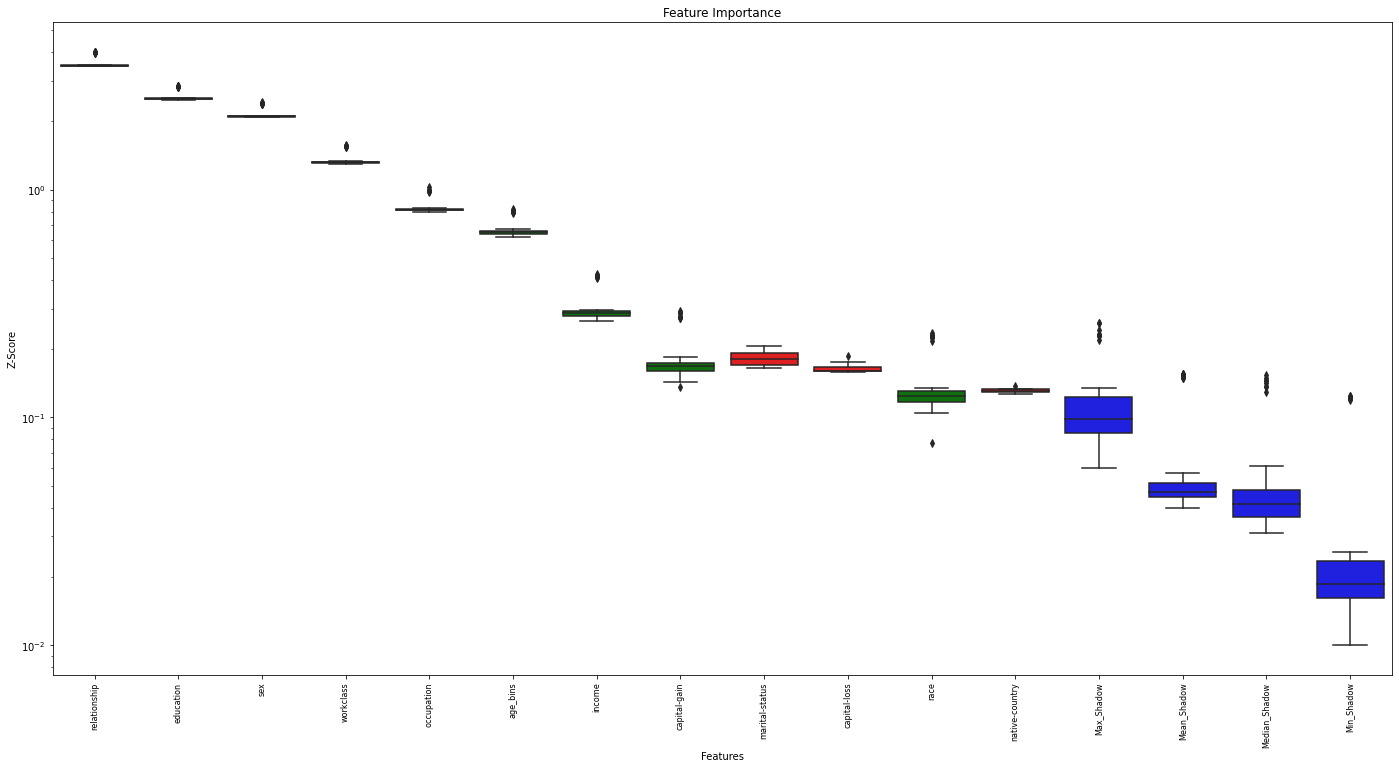

In [ ]:
Feature_Selector.plot(which_features='all', figsize=(24,12))

In [ ]:
col_penting = Feature_Selector.Subset()
col_penting.columns

Index(['sex', 'race', 'age_bins', 'education', 'relationship', 'capital-gain',
       'income', 'workclass', 'occupation'],
      dtype='object')

In [ ]:
#feature important
col_penting

,sex,race,age_bins,education,relationship,capital-gain,income,workclass,occupation
16887,Female,Asian-Pac-Islander,25-50,1st-12th,Wife,max,<=50K,Private,blue-colar
17783,Male,White,50-75,HS-grad,Husband,max,<=50K,self_emp,blue-colar
3833,Male,White,50-75,Some-college,Husband,max,<=50K,Private,Adm-clerical
5631,Male,White,25-50,HS-grad,Husband,max,>50K,Private,blue-colar
10368,Male,White,50-75,1st-12th,Husband,none,<=50K,Without-pay,blue-colar
...,...,...,...,...,...,...,...,...,...
11284,Male,Black,25-50,HS-grad,Own-child,max,<=50K,Without-pay,blue-colar
11964,Female,Asian-Pac-Islander,50-75,1st-12th,Wife,min,>50K,Private,Sales
5390,Male,White,0-25,1st-12th,Own-child,max,<=50K,Private,Sales
860,Male,White,25-50,HS-grad,Husband,min,>50K,Private,blue-colar


In [ ]:
score_train = []
score_val = []
loss_rmse = []

#Model 1 
Randomforest, Adaboost, Gradienboost, Xgboost, Decisiontree, Extratree, Histgradientboost

In [ ]:
x_train_1 = x_train[col_penting.columns]
x_val_1 = x_val[col_penting.columns]

In [ ]:
x_train_1.head()

,sex,race,age_bins,education,relationship,capital-gain,income,workclass,occupation
16887,Female,Asian-Pac-Islander,25-50,1st-12th,Wife,max,<=50K,Private,blue-colar
17783,Male,White,50-75,HS-grad,Husband,max,<=50K,self_emp,blue-colar
3833,Male,White,50-75,Some-college,Husband,max,<=50K,Private,Adm-clerical
5631,Male,White,25-50,HS-grad,Husband,max,>50K,Private,blue-colar
10368,Male,White,50-75,1st-12th,Husband,none,<=50K,Without-pay,blue-colar


In [ ]:
dic = {}
for i in x_train_1.columns: 
    dic[i] = LabelEncoder()
    x_train_1[i] = dic[i].fit_transform(x_train_1[i])
    x_val_1[i] = dic[i].transform(x_val_1[i])

In [ ]:
x_train_1.head()

,sex,race,age_bins,education,relationship,capital-gain,income,workclass,occupation
16887,0,1,1,0,5,0,0,1,4
17783,1,4,2,3,0,0,0,3,4
3833,1,4,2,7,0,0,0,1,0
5631,1,4,1,3,0,0,1,1,4
10368,1,4,2,0,0,2,0,2,4


In [ ]:
#all models 1
DT = DecisionTreeRegressor(random_state=10) 
RF = RandomForestRegressor(random_state=10)
EXT = ExtraTreeRegressor(random_state=10)
ADA = AdaBoostRegressor(learning_rate=0.01,random_state=10)
GBT = GradientBoostingRegressor(learning_rate=0.01, random_state=10) 
HGBT = HistGradientBoostingRegressor(learning_rate=0.01, random_state=10)
XGB = XGBRegressor(learning_rate = 0.01,random_state=10)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)
 
    #score train dan val
    score_train.append(model.score(x_train, y_train)) 
    score_val.append(model.score(x_val, y_val)) 
        
    #roc auc score
    pred = model.predict(x_val)
    rmse = mean_squared_error(y_val, pred, squared=False) 
    loss_rmse.append(rmse) 
    
    return model

In [ ]:
for i in [DT,RF,EXT,ADA,GBT,HGBT,XGB]:
    print(20*"-")
    print(i,"Done")
    score_1(i, x_train_1, y_train, x_val_1, y_val)

--------------------
DecisionTreeRegressor(random_state=10) Done
--------------------
RandomForestRegressor(random_state=10) Done
--------------------
ExtraTreeRegressor(random_state=10) Done
--------------------
AdaBoostRegressor(learning_rate=0.01, random_state=10) Done
--------------------
GradientBoostingRegressor(learning_rate=0.01, random_state=10) Done
--------------------
HistGradientBoostingRegressor(learning_rate=0.01, random_state=10) Done
--------------------
XGBRegressor(learning_rate=0.01, random_state=10) Done
[07:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#Model 2
LGBM, CATBOOST

In [ ]:
x_train_2 = x_train[col_penting.columns]
x_val_2 = x_val[col_penting.columns]

In [ ]:
x_train_2.dtypes

sex             category
race            category
age_bins        category
education       category
relationship    category
capital-gain    category
income          category
workclass       category
occupation      category
dtype: object

In [ ]:
cater = x_train_2.columns.to_list()

In [ ]:
CB = CatBoostRegressor(learning_rate=0.01, random_state=10)
LGBM = LGBMRegressor(learning_rate=0.01, random_state=10)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)
 
       #accuracy train dan val
       score_train.append(model.score(x_train, y_train))
       score_val.append(model.score(x_val, y_val))
     
   
       #rmse
       pred = model.predict(x_val) 
       rmse = mean_squared_error(y_val, pred,squared=False)
       loss_rmse.append(rmse)
 
   #catboost
    else:         
       model.fit(x_train,y_train,cat_features=cater,verbose=False)
 
       #accuracy train dan val
       score_train.append(model.score(x_train, y_train))
       score_val.append(model.score(x_val, y_val))
          
       #rmse
       pred = model.predict(x_val)
       rmse = mean_squared_error(y_val, pred,squared=False)
       loss_rmse.append(rmse)

    return model

In [ ]:
for i in [LGBM,CB]:
    print(20*"-")
    print(i,"Done")
    score_2(i, x_train_2, y_train, x_val_2, y_val)

--------------------
LGBMRegressor(learning_rate=0.01, random_state=10) Done
--------------------
<catboost.core.CatBoostRegressor object at 0x7f2542ca6310> Done


#Model 3 
KNN, SVM, LinearRegression, Lasso(l1), Ridge(l2)

In [ ]:
x_train_3 = x_train_1
x_val_3 = x_val_1

In [ ]:
sc = StandardScaler()
x_train_3 = sc.fit_transform(x_train_3)
x_val_3 = sc.transform(x_val_3)

In [ ]:
KNN = KNeighborsRegressor()
SVM = SVR(kernel="linear")
LR = LinearRegression()
RIDGE = Ridge(random_state=10)
LASSO  = Lasso(random_state=10)

In [ ]:
def score_3(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)
 
    #score train dan val
    score_train.append(model.score(x_train, y_train)) 
    score_val.append(model.score(x_val, y_val)) 
        
    #roc auc score
    pred = model.predict(x_val)
    rmse = mean_squared_error(y_val, pred, squared=False) 
    loss_rmse.append(rmse) 
    
    return model

In [ ]:
for i in [KNN,SVM,LR,RIDGE,LASSO]:
    print(20*"-")
    print(i,"Done")
    score_3(i, x_train_3, y_train, x_val_3, y_val)

--------------------
KNeighborsRegressor() Done
--------------------
SVR(kernel='linear') Done
--------------------
LinearRegression() Done
--------------------
Ridge(random_state=10) Done
--------------------
Lasso(random_state=10) Done


#Model selection

In [ ]:
all_models = pd.DataFrame({"models": ["DT","RF","EXT","ADA","GBT","HGBT","XGB","LGBM","CB","KNN","SVR","LR","RIDGE","LASSO"],
                         "score_train":score_train, "score_val":score_val, "loss_rmse":loss_rmse})

In [ ]:
all_models = all_models.set_index("models")

In [ ]:
all_models

,score_train,score_val,loss_rmse
models,,,
DT,0.612299,-0.197956,12.022999
RF,0.567333,0.076626,10.555556
EXT,0.612299,-0.216227,12.114340
ADA,0.171139,0.176165,9.970397
GBT,0.157617,0.162470,10.052928
HGBT,0.193870,0.189135,9.891601
XGB,-1.533037,-1.545629,17.526287
LGBM,0.206736,0.205137,9.793513
CB,0.258345,0.247913,9.526349


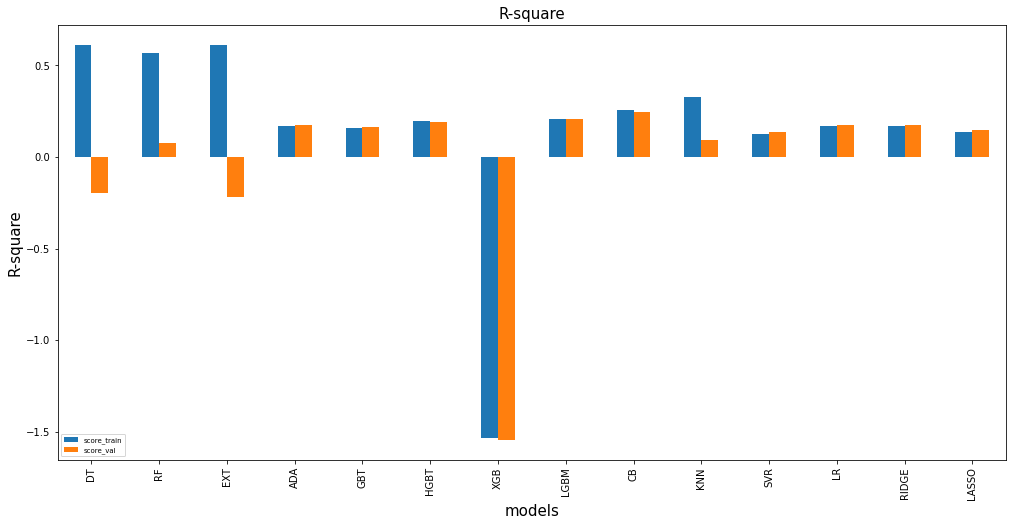

In [ ]:
all_models[["score_train", "score_val"]].plot.bar(figsize=(17,8))
plt.title("R-square", size=15)
plt.ylabel("R-square", size=15) 
plt.yticks(size=10)
plt.xlabel("models", size=15) 
plt.xticks(size=10)
plt.legend(loc=3,fontsize=7)
plt.show()

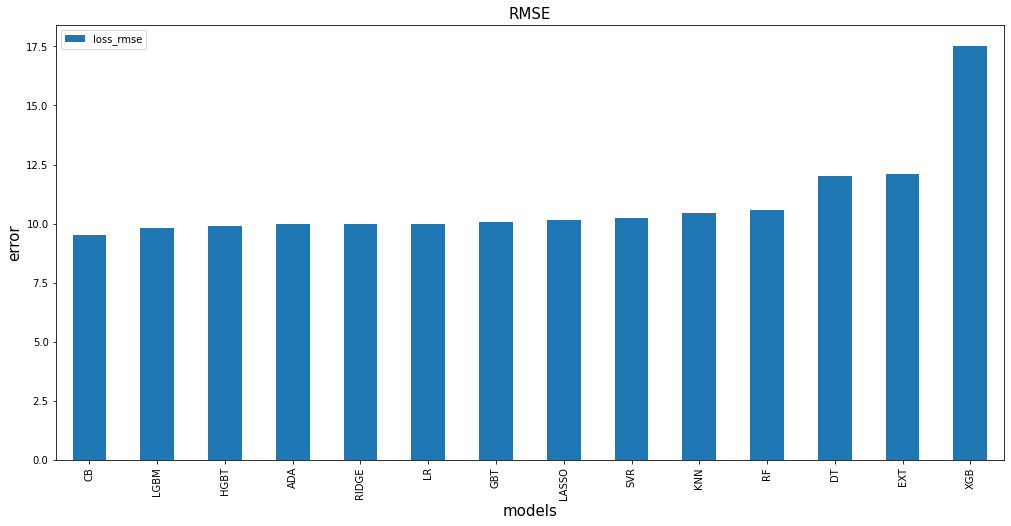

In [ ]:
plt.figure(figsize=(17, 8)) 

all_models.loss_rmse.sort_values().plot(kind="bar")
plt.title("RMSE", size=15)
plt.ylabel("error",size=15)
plt.yticks(size=10)
plt.xlabel("models",size=15) 
plt.xticks(size=10)
plt.legend()
plt.show()

# Hyperparameterize tuning

In [ ]:
def objective(trial):
    
    params = {#'loss_function':'Logloss',              
              #'eval_metric':'Accuracy',
              #'task_type' : trial.suggest_categorical("task_type",["GPU"]),           
              'bootstrap_type':trial.suggest_categorical("bootstrap_type",["Bernoulli"]), #"MVS"]),#"Bayesian" 
              'iterations':trial.suggest_int("iterations", 1000,10000),
              'od_wait':trial.suggest_int('od_wait', 500, 2000), 
              'random_strength': trial.suggest_uniform('random_strength',10,50),                           
              'learning_rate' : trial.suggest_uniform('learning_rate',0.01,0.03),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'depth': trial.suggest_int('depth',1,10),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
               }
    model = CatBoostRegressor(**params)  
    model.fit(x_train_2,y_train,eval_set=[(x_val_2,y_val)],verbose=False,early_stopping_rounds=100,
             cat_features = cater) #catfeatures for category cols
        
    y_preds = model.predict(x_val_2)    
    error = mean_squared_error(y_val, y_preds,squared=False)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-09-30 07:20:12,159] A new study created in memory with name: no-name-848faf4f-e724-4779-a004-e7806d737100
[I 2021-09-30 07:20:40,468] Trial 0 finished with value: 9.527687995459267 and parameters: {'bootstrap_type': 'Bernoulli', 'iterations': 1762, 'od_wait': 601, 'random_strength': 43.05802396833062, 'learning_rate': 0.012698748660933465, 'reg_lambda': 57.345144655722, 'subsample': 0.8300588748547283, 'depth': 6, 'min_data_in_leaf': 21, 'leaf_estimation_iterations': 6}. Best is trial 0 with value: 9.527687995459267.
[I 2021-09-30 07:20:46,566] Trial 1 finished with value: 9.568653785338519 and parameters: {'bootstrap_type': 'Bernoulli', 'iterations': 1184, 'od_wait': 718, 'random_strength': 30.053311280955537, 'learning_rate': 0.024664472983399466, 'reg_lambda': 51.29755796797268, 'subsample': 0.18208400777050915, 'depth': 2, 'min_data_in_leaf': 18, 'leaf_estimation_iterations': 6}. Best is trial 0 with value: 9.527687995459267.
[I 2021-09-30 07:21:06,823] Trial 2 finished wit

In [ ]:
cb_params = study.best_trial.params

In [ ]:
cb_params["loss_function"] = "RMSE"
cb_params["iterations"] = 10000

In [ ]:
cb_params

{'bootstrap_type': 'Bernoulli',
 'depth': 4,
 'iterations': 10000,
 'leaf_estimation_iterations': 10,
 'learning_rate': 0.029656699439548673,
 'loss_function': 'RMSE',
 'min_data_in_leaf': 13,
 'od_wait': 1080,
 'random_strength': 49.661528549821156,
 'reg_lambda': 68.88701396281562,
 'subsample': 0.5713346338207339}

#Cross validation

In [ ]:
# kfold 5 split
val_pred = []
test_pred = []
error_rmse = []

def cross_val(X, y, test, model, params, folds=5):

    skf = KFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold + 1}")
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        alg = model(**params)
        alg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                cat_features = cater, 
                early_stopping_rounds=100,
                verbose=False)

        pred = alg.predict(X_val)
        val_pred.append(pred) 

        error = mean_squared_error(y_val, pred, squared=False)
        error_rmse.append(error) 

        y_pred = alg.predict(tester)
        test_pred.append(y_pred)
        print(f"error: {error}")
        print("-"*50)

    print(f"\nmean error folds: {np.array(error_rmse).mean()}")
    return alg

In [ ]:
#bikin var baru 
x_new = x[col_penting.columns]
y_new = y
tester = test[col_penting.columns]

In [ ]:
score_cb = cross_val(x_new,y_new,tester,CatBoostRegressor, cb_params)

Fold: 1
error: 9.494440721062471
--------------------------------------------------
Fold: 2
error: 9.715098811363942
--------------------------------------------------
Fold: 3
error: 9.65887526964947
--------------------------------------------------
Fold: 4
error: 9.874594625266406
--------------------------------------------------
Fold: 5
error: 9.736519716141293
--------------------------------------------------

mean error folds: 9.695905828696716


In [ ]:
#predict x_new
y_val_pred = score_cb.predict(x_new)

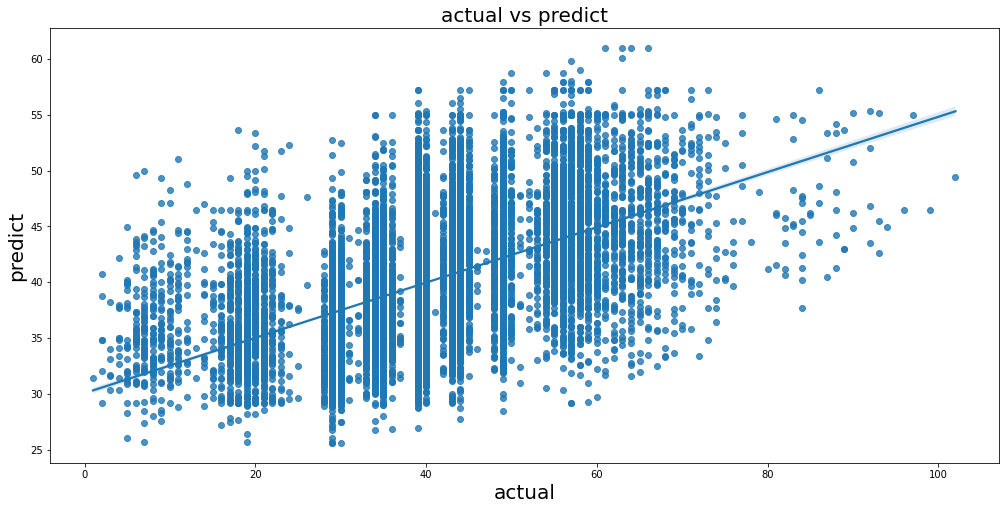

In [ ]:
plt.figure(figsize=(17, 8)) 

sns.regplot(x = y_new,y = y_val_pred)
plt.title("actual vs predict", size=20)
plt.xlabel("actual", size=20)
plt.ylabel("predict", size=20)
plt.show()

In [ ]:
#RMSE
mean_squared_error(y_new, y_val_pred, squared=False)

9.593970079850214

# Blending average target

In [ ]:

#blending
Blending_target = np.mean(np.column_stack(test_pred), axis=1)

In [ ]:
save = pd.DataFrame({"hours-per-week": Blending_target})

In [ ]:
save

,hours-per-week
0,37.873731
1,40.057317
2,35.681648
3,44.398721
4,41.597455
...,...
8114,37.870250
8115,38.338064
8116,34.065607
8117,40.078801


In [ ]:
save.to_csv("my_subs1.csv", index=False)